## f1-score
$$ \text{F1-Score}=\cfrac{1}{\cfrac{1}{Recall}+\cfrac{1}{Precision}}$$

* Recall= Sensibilidad
* Exactitud
* Precion

### Media Geoametrica
$$G=\sqrt[n]{x_1^n+..x_m^n}$$

$$ \text{F1-Score}=\cfrac{1}{\cfrac{1}{Recall}+\cfrac{1}{Recall}}$$
$$\text{F1-Score}=\cfrac{1}{\cfrac{2}{Recall}} $$
$$\text{F1-Score}=\cfrac{Recall}{2} $$


In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [3]:
from sklearn.datasets import make_blobs

In [4]:
make_blobs?

Signature:
make_blobs(
    n_samples=100,
    n_features=2,
    *,
    centers=None,
    cluster_std=1.0,
    center_box=(-10.0, 10.0),
    shuffle=True,
    random_state=None,
    return_centers=False,
)
Docstring:
Generate isotropic Gaussian blobs for clustering.

Read more in the :ref:`User Guide <sample_generators>`.

Parameters
----------
n_samples : int or array-like, default=100
    If int, it is the total number of points equally divided among
    clusters.
    If array-like, each element of the sequence indicates
    the number of samples per cluster.

    .. versionchanged:: v0.20
        one can now pass an array-like to the ``n_samples`` parameter

n_features : int, default=2
    The number of features for each sample.

centers : int or ndarray of shape (n_centers, n_features), default=None
    The number of centers to generate, or the fixed center locations.
    If n_samples is an int and centers is None, 3 centers are generated.
    If n_samples is array-like, centers mus

In [6]:
k=3
n_muestra=5000
centroides=[(24,30),(52,35),(35,52)]
X,clases_real=make_blobs(n_samples=n_muestra,n_features=2,centers=centroides,cluster_std=2,shuffle=True,random_state=42)

In [7]:
X.shape

(5000, 2)

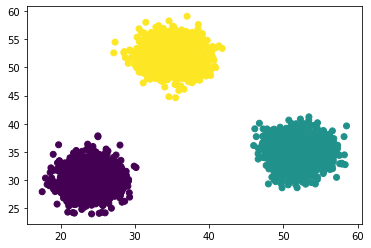

In [9]:
plt.scatter(X[:,0],X[:,1],c=clases_real)

In [10]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, homogeneity_completeness_v_measure

In [11]:
kmedias=KMeans(n_clusters=3)
etiquetas=kmedias.fit(X).labels_

In [12]:
pd.crosstab(clases_real,etiquetas)

col_0,0,1,2
row_0,,,
0,0,0,1667
1,0,1667,0
2,1666,0,0


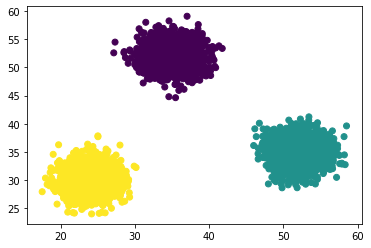

In [13]:
plt.scatter(X[:,0],X[:,1],c=etiquetas)

## Indice de Jaccard
$$ \cfrac{P(A \cap B)}{P(A \cup B)}

In [19]:
interseccion=np.intersect1d(X[clases_real==2],X[etiquetas==0]).shape[0]
union=np.union1d(X[clases_real==2],X[etiquetas==0]).shape[0]
interseccion/union


1.0

In [21]:
from itertools import product

In [24]:
list(product([1,2],[3,4]))

[(1, 3), (1, 4), (2, 3), (2, 4)]

In [25]:
def indice_jaccard(cluster_1,cluster_2):
    interseccion=np.intersect1d(cluster_1,cluster_2).shape[0]
    union=np.union1d(cluster_1,cluster_2).shape[0]
    return interseccion/union

In [26]:
combinaciones=product(np.unique(clases_real),np.unique(etiquetas))

In [28]:
list(combinaciones)

[(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]

In [29]:
emparejados={}
for cluster in np.unique(clases_real):
    valor_jacard=0
    for etiqueta in np.unique(etiquetas):
        valor_jacard_nuevo=indice_jaccard(X[clases_real==cluster],X[etiquetas==etiqueta])
        if valor_jacard_nuevo>valor_jacard:
            valor_jacard=valor_jacard_nuevo
            emparejados[cluster]=etiqueta
            if  valor_jacard>0.5:
                break

In [30]:
emparejados

{0: 2, 1: 1, 2: 0}